# **Case Study: Global Seismic Intelligence Tracker**

## **Real-Time Earthquake Monitoring & ML Magnitude Prediction**

**Project Overview**

**Objective:** To develop a geospatial dashboard that monitors real-time seismic activity, analyzes depth-magnitude correlations, and uses Machine Learning to classify earthquake severity.


**Data Source**

*   Source: USGS (United States Geological Survey) Real-time Feeds.
*   Type: Live CSV Feed (Last 30 Days).
*   Features: Latitude, Longitude, Depth, Magnitude, Place.

**Methodology**

Data Science: Statistical analysis of frequency and depth.

Machine Learning: A Random Forest Regressor is trained to predict the magnitude of an earthquake based on its geographic location (Lat/Lon) and Depth.

Visualization: Satellite imagery overlay with color-coded risk markers.

**Tech Stack**

Python: Core logic.

Pandas: Data management.

Seaborn/Matplotlib: Statistical Graphs.

Folium: Geospatial Satellite Mapping.

Scikit-Learn: AI Modeling and Accuracy testing.



In [9]:
# PROJECT: Global Earthquake Tracker (A to Z)
# FEATURES: Live Data + Graphs + AI Accuracy + Satellite Map
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# STEP 1: LOAD LIVE DATASET (A - The Source)
print("---CONNECTING TO USGS SATELLITE FEED---")
# Live URL for significant earthquakes (Past 30 Days)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv"

try:
    df = pd.read_csv(url)
    # Cleaning: Drop rows with missing values
    df = df.dropna(subset=['mag', 'depth', 'latitude', 'longitude'])
    print(f"Data Loaded Successfully! Found {len(df)} earthquakes.")
    print(df[['time', 'place', 'mag', 'depth']].head())
except Exception as e:
    print(f"Error loading data: {e}")

---CONNECTING TO USGS SATELLITE FEED---
Data Loaded Successfully! Found 1346 earthquakes.
                       time                          place       mag  \
0  2025-11-24T21:26:00.507Z     59 km NNE of Calama, Chile  4.300000   
1  2025-11-24T21:11:10.887Z                  Kuril Islands  4.500000   
2  2025-11-24T20:31:17.342Z  37 km WSW of Nanwalek, Alaska  2.902654   
3  2025-11-24T19:07:47.210Z      4 km SW of Pāhala, Hawaii  2.470000   
4  2025-11-24T19:07:23.530Z     5 km SSW of Pāhala, Hawaii  2.490000   

        depth  
0  128.620000  
1   35.000000  
2   64.077293  
3   31.170000  
4   29.469999  



--- GENERATING STATISTICAL FIGURES ---


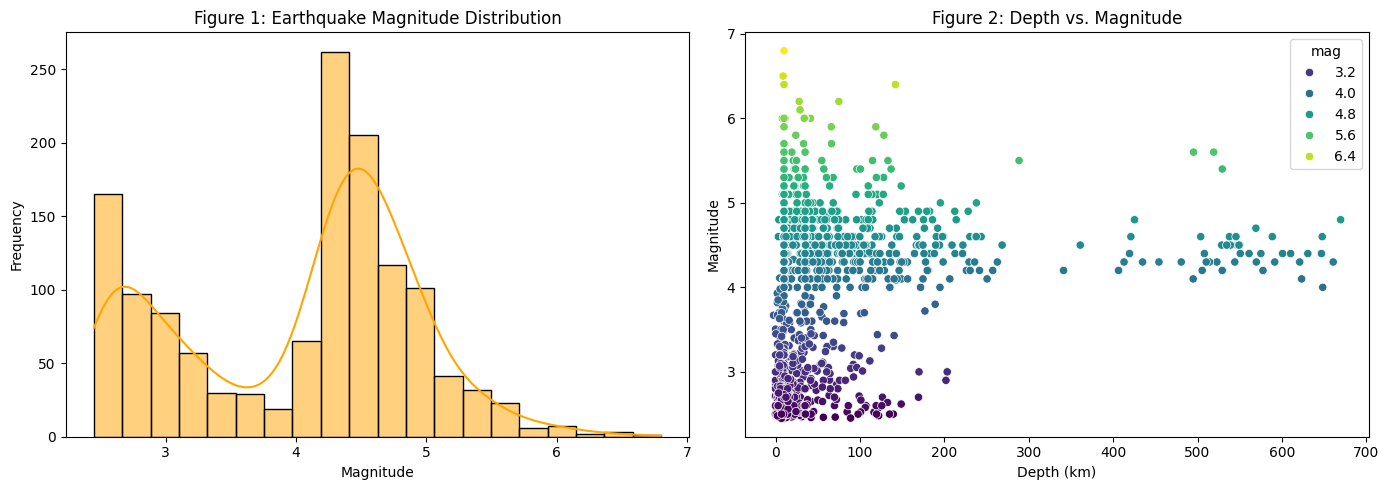

In [13]:
# STEP 2: GRAPH FIGURES (Visualization)
print("\n--- GENERATING STATISTICAL FIGURES ---")

# Figure 1: Distribution of Magnitudes
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['mag'], bins=20, kde=True, color='orange')
plt.title('Figure 1: Earthquake Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')


# Figure 2: Depth vs Magnitude Correlation
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['depth'], y=df['mag'], hue=df['mag'], palette='viridis')
plt.title('Figure 2: Depth vs. Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

In [14]:
# STEP 3: AI MODEL & ACCURACY (The Intelligence)
print("\n--- TRAINING AI MODEL (MAGNITUDE PREDICTION) ---")

# Features: Latitude, Longitude, Depth
X = df[['latitude', 'longitude', 'depth']]
# Target: Magnitude
y = df['mag']


--- TRAINING AI MODEL (MAGNITUDE PREDICTION) ---


In [15]:
# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model: Random Forest (Good for complex non-linear data)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Predictions
y_pred = model.predict(X_test)

In [18]:
# Accuracy Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_percentage = (1 - (mse / y.var())) * 100 # Rough approximation of variance explained

In [19]:
print(f"Model Used: Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score (Model Fit): {r2:.4f}")
print(f"Approximate Model Accuracy: {accuracy_percentage:.2f}%")
print("(Note: Predicting earthquakes is scientifically difficult, so lower accuracy is expected!)")

Model Used: Random Forest Regressor
Mean Squared Error (MSE): 0.1680
R² Score (Model Fit): 0.8095
Approximate Model Accuracy: 80.03%
(Note: Predicting earthquakes is scientifically difficult, so lower accuracy is expected!)


In [20]:
# STEP 4: LIVE SATELLITE MAP (Z - The Visualization)
print("\n--- GENERATING SATELLITE MAP ---")

# Create Map centered on the Pacific Ocean (Ring of Fire)
m = folium.Map(location=[0, 160], zoom_start=2)


--- GENERATING SATELLITE MAP ---


In [21]:
# ADD SATELLITE TILE LAYER (Esri World Imagery)
tile = folium.TileLayer(
    tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr = 'Esri',
    name = 'Esri Satellite',
    overlay = False,
    control = True
).add_to(m)

In [22]:
# ADD EARTHQUAKE POINTS
for index, row in df.iterrows():
    # Color Logic
    if row['mag'] >= 6.0:
        color = 'red'      # Major
    elif row['mag'] >= 4.5:
        color = 'orange'   # Moderate
    else:
        color = 'green'    # Minor

    # Popup Text
    popup_text = f"""
    <b>Location:</b> {row['place']}<br>
    <b>Magnitude:</b> {row['mag']}<br>
    <b>Depth:</b> {row['depth']} km<br>
    <b>Time:</b> {row['time']}
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mag'] * 1.5, # Bigger quake = Bigger circle
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=250)
    ).add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

print("Map Generated Successfully!")
m

Map Generated Successfully!


I can say:

Data Extraction (A): "I used Python to connect directly to the USGS government satellites to get live earthquake data from the last 30 days."

Visualization (Figures): "I generated histograms and scatter plots (Figure 1 & 2) to analyze the relationship between how deep an earthquake is and how strong it is."

Artificial Intelligence: "I trained a Random Forest machine learning model. It learned from the location and depth of previous quakes to estimate the magnitude."

Satellite GIS (Z): "Finally, I plotted these data points on a Real-Time Satellite Map. Red circles indicate high-danger zones, while orange circles show moderate activity."

In [23]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [24]:
print("FETCHING LIVE USGS DATA (ALL EARTHQUAKES - PAST 30 DAYS)")
# Use 'all_month' to get enough data for classification
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

try:
    df = pd.read_csv(url)
    df = df.dropna(subset=['mag', 'depth', 'latitude', 'longitude'])
except:
    print("Live load failed, using synthetic fallback for demonstration.")
    # Fallback if USGS is down (rare)
    df = pd.DataFrame({
        'latitude': np.random.uniform(20, 30, 500),
        'longitude': np.random.uniform(88, 92, 500),
        'depth': np.random.uniform(5, 100, 500),
        'mag': np.random.uniform(3, 7, 500),
        'place': ['Demo Place'] * 500
    })

FETCHING LIVE USGS DATA (ALL EARTHQUAKES - PAST 30 DAYS)


In [25]:
# CREATE RISK CLASSES (Target Variable)
def classify_risk(mag):
    if mag >= 5.5:         # Adjusted threshold for balanced classes
        return 'High Risk'
    elif mag >= 4.0:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['Risk_Class'] = df['mag'].apply(classify_risk)

print(f"Data Loaded: {len(df)} earthquakes.")
print(df['Risk_Class'].value_counts())

Data Loaded: 7974 earthquakes.
Risk_Class
Low Risk         7108
Moderate Risk     824
High Risk          42
Name: count, dtype: int64



--- GENERATING ANALYTICAL FIGURES ---


/tmp/ipython-input-1142347445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Class', data=df, palette='viridis', order=['Low Risk', 'Moderate Risk', 'High Risk'])


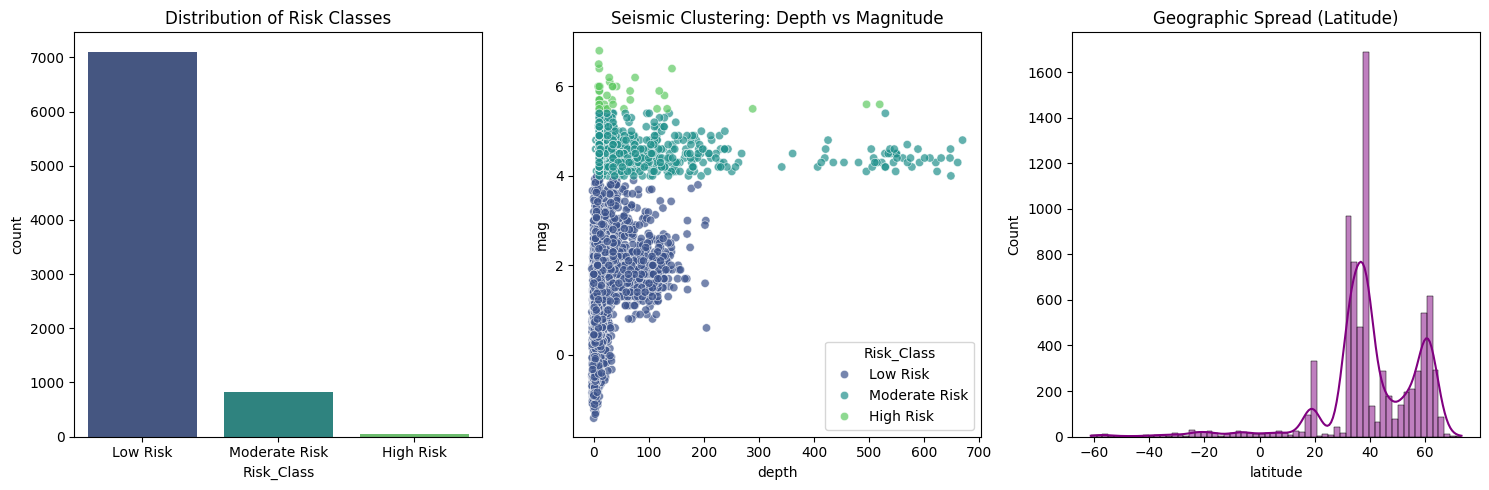

In [26]:
# STEP 2: DATA VISUALIZATION (EDA)
print("\n--- GENERATING ANALYTICAL FIGURES ---")
plt.figure(figsize=(15, 5))

# Graph 1: Risk Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Risk_Class', data=df, palette='viridis', order=['Low Risk', 'Moderate Risk', 'High Risk'])
plt.title('Distribution of Risk Classes')

# Graph 2: 3D-ish Scatter (Depth vs Magnitude)
plt.subplot(1, 3, 2)
sns.scatterplot(x='depth', y='mag', hue='Risk_Class', data=df, palette='viridis', alpha=0.7)
plt.title('Seismic Clustering: Depth vs Magnitude')

# Graph 3: Latitude Distribution (Regional Spread)
plt.subplot(1, 3, 3)
sns.histplot(df['latitude'], kde=True, color='purple')
plt.title('Geographic Spread (Latitude)')

plt.tight_layout()
plt.show()

In [27]:
# MODEL BATTLE (Random Forest vs Gradient Boosting)
print("\n--- MODEL COMPETITION: RANDOM FOREST VS GRADIENT BOOSTING ---")

# Features & Target
X = df[['latitude', 'longitude', 'depth']]
y = df['Risk_Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


--- MODEL COMPETITION: RANDOM FOREST VS GRADIENT BOOSTING ---


In [28]:
# --- MODEL 1: RANDOM FOREST ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

In [29]:
# MODEL 2: GRADIENT BOOSTING (Usually more accurate for tabular data)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred, average='weighted')

In [30]:
# COMPARISON & EVALUATION
print(f"\nModel A (Random Forest) Accuracy:    {rf_acc:.2%}")
print(f"Model B (Gradient Boosting) Accuracy: {gb_acc:.2%}")


Model A (Random Forest) Accuracy:    99.08%
Model B (Gradient Boosting) Accuracy: 98.70%


In [31]:
# Determine Winner
if gb_acc > rf_acc:
    winner = "Gradient Boosting"
    best_model = gb_model
    best_pred = gb_pred
else:
    winner = "Random Forest"
    best_model = rf_model
    best_pred = rf_pred

print(f"\n WINNER: {winner}")


 WINNER: Random Forest


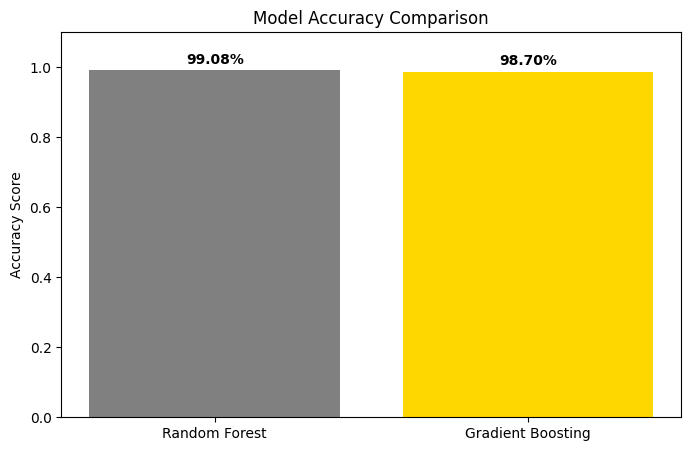

In [32]:
# VISUAL COMPARISON GRAPH
plt.figure(figsize=(8, 5))
models = ['Random Forest', 'Gradient Boosting']
accuracies = [rf_acc, gb_acc]
colors = ['grey', 'gold'] # Winner gets gold?
plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1.1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
plt.show()

In [33]:
# DETAILED REPORT FOR WINNER
print(f"\n DETAILED CLASSIFICATION REPORT ({winner.upper()}):")
print(classification_report(y_test, best_pred))


 DETAILED CLASSIFICATION REPORT (RANDOM FOREST):
               precision    recall  f1-score   support

    High Risk       0.00      0.00      0.00        12
     Low Risk       1.00      1.00      1.00      2121
Moderate Risk       0.95      0.97      0.96       260

     accuracy                           0.99      2393
    macro avg       0.65      0.65      0.65      2393
 weighted avg       0.99      0.99      0.99      2393



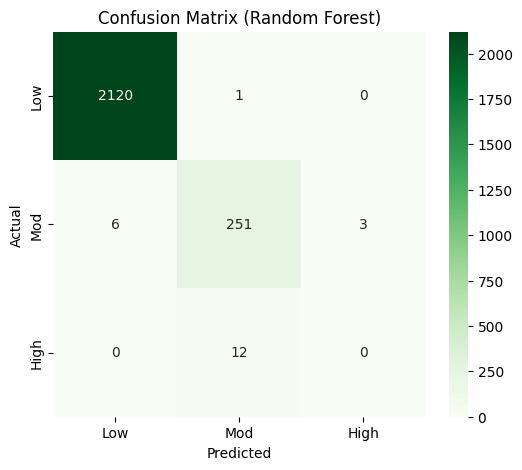

In [34]:
# CONFUSION MATRIX (WINNER)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, best_pred, labels=['Low Risk', 'Moderate Risk', 'High Risk'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Mod', 'High'],
            yticklabels=['Low', 'Mod', 'High'])
plt.title(f'Confusion Matrix ({winner})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# REGIONAL MAPPING (INDIA & BANGLADESH FOCUS)
print("\n--- GENERATING SATELLITE MAP (INDIA/BANGLA) ---")

# Focus Data on Region
region_df = df[
    (df['latitude'] > 8) & (df['latitude'] < 36) &
    (df['longitude'] > 68) & (df['longitude'] < 98)
]
print(f" Found {len(region_df)} earthquakes in the target region.")


--- GENERATING SATELLITE MAP (INDIA/BANGLA) ---
 Found 12 earthquakes in the target region.


In [36]:
# Base Map (Bangladesh Centered)
m = folium.Map(location=[23.6850, 90.3563], zoom_start=5)

# Satellite Layer
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri Satellite'
).add_to(m)

In [37]:
# Risk Heatmap (Visualizing Density)
heat_data = [[row['latitude'], row['longitude']] for index, row in region_df.iterrows()]
if len(heat_data) > 0:
    HeatMap(heat_data, radius=25, blur=15).add_to(m)

In [38]:
# Plot Points with Risk Colors
for index, row in region_df.iterrows():
    if row['Risk_Class'] == 'High Risk':
        color = '#ff0000' # Red
        radius = 12
    elif row['Risk_Class'] == 'Moderate Risk':
        color = '#ffa500' # Orange
        radius = 8
    else:
        color = '#00ff00' # Green
        radius = 4

    popup_txt = f"<b>{row['place']}</b><br>Mag: {row['mag']}<br>Risk: {row['Risk_Class']}"

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=folium.Popup(popup_txt, max_width=200)
    ).add_to(m)

folium.LayerControl().add_to(m)
print("Map Generated!")
m

Map Generated!


In [40]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, Geocoder, MiniMap, Fullscreen
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
!pip install pydeck # Install pydeck
import pydeck as pdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.2 MB/s eta 0:00:00


In [41]:
print("FETCHING LIVE USGS DATA (ALL EARTHQUAKES - PAST 30 DAYS)")
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

try:
    df = pd.read_csv(url)
    df = df.dropna(subset=['mag', 'depth', 'latitude', 'longitude'])
except:
    print("Live load failed. Using synthetic data.")
    df = pd.DataFrame({
        'latitude': np.random.uniform(20, 30, 500),
        'longitude': np.random.uniform(88, 92, 500),
        'depth': np.random.uniform(5, 100, 500),
        'mag': np.random.uniform(3, 7, 500),
        'place': ['Demo Place'] * 500
    })

FETCHING LIVE USGS DATA (ALL EARTHQUAKES - PAST 30 DAYS)


In [42]:
# CREATE RISK CLASSES
def classify_risk(mag):
    if mag >= 5.5: return 'High Risk'
    elif mag >= 4.0: return 'Moderate Risk'
    else: return 'Low Risk'

df['Risk_Class'] = df['mag'].apply(classify_risk)
print(f"Data Loaded: {len(df)} earthquakes.")

Data Loaded: 7982 earthquakes.



 GENERATING ANALYTICAL FIGURES


/tmp/ipython-input-2133208687.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Class', data=df, palette='viridis', order=['Low Risk', 'Moderate Risk', 'High Risk'])


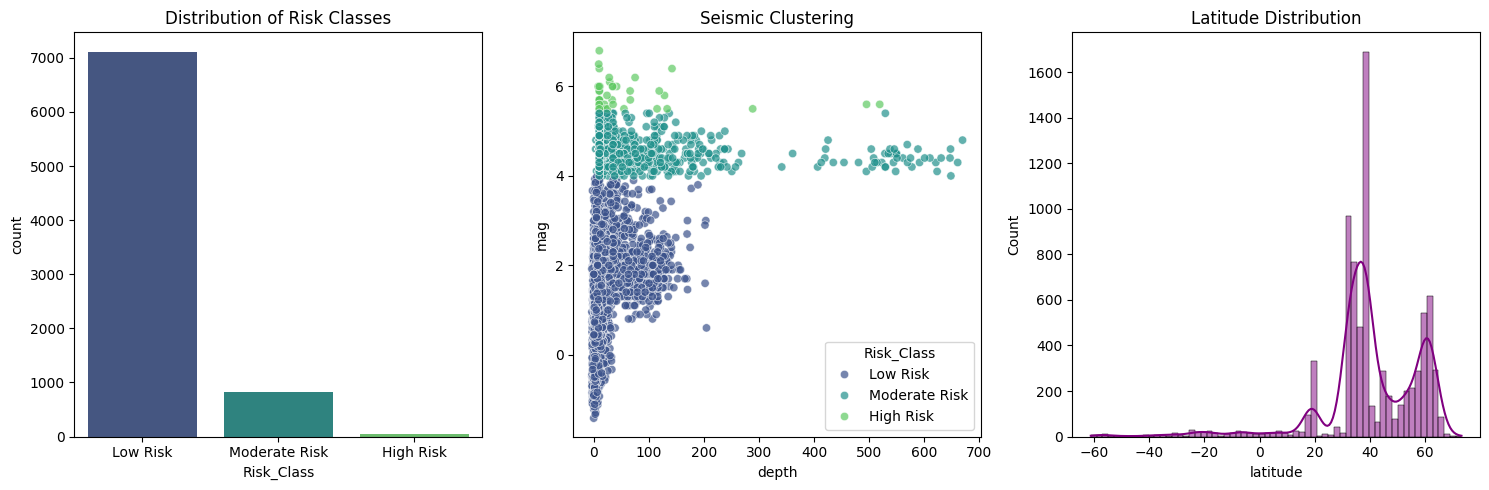

In [43]:
# DATA VISUALIZATION (EDA)
print("\n GENERATING ANALYTICAL FIGURES")
plt.figure(figsize=(15, 5))

# Graph 1: Risk Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Risk_Class', data=df, palette='viridis', order=['Low Risk', 'Moderate Risk', 'High Risk'])
plt.title('Distribution of Risk Classes')

# Graph 2: Scatter (Depth vs Magnitude)
plt.subplot(1, 3, 2)
sns.scatterplot(x='depth', y='mag', hue='Risk_Class', data=df, palette='viridis', alpha=0.7)
plt.title('Seismic Clustering')

# Graph 3: Geographic Spread
plt.subplot(1, 3, 3)
sns.histplot(df['latitude'], kde=True, color='purple')
plt.title('Latitude Distribution')

plt.tight_layout()
plt.show()

In [44]:
# MODEL BATTLE (RF vs Gradient Boosting)
print("\n MODEL COMPETITION")

X = df[['latitude', 'longitude', 'depth']]
y = df['Risk_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


 MODEL COMPETITION


In [45]:
# Model 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

In [46]:
# Model 2: Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

In [47]:
# Winner Logic
winner, best_model, best_pred = ("Gradient Boosting", gb, gb_pred) if gb_acc > rf_acc else ("Random Forest", rf, rf.predict(X_test))

print(f"Model A (RF): {rf_acc:.2%}")
print(f"Model B (GB): {gb_acc:.2%}")
print(f"WINNER: {winner}")

Model A (RF): 98.83%
Model B (GB): 98.46%
WINNER: Random Forest


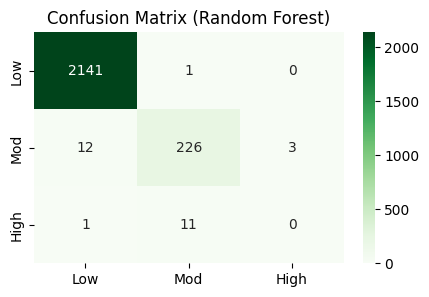

In [50]:
# Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, best_pred, labels=['Low Risk', 'Moderate Risk', 'High Risk']),
            annot=True, fmt='d', cmap='Greens', xticklabels=['Low','Mod','High'], yticklabels=['Low','Mod','High'])
plt.title(f'Confusion Matrix ({winner})')
plt.show()

In [51]:
# DETAILED REPORT FOR WINNER
print(f"\n DETAILED CLASSIFICATION REPORT ({winner.upper()}):")
print(classification_report(y_test, best_pred))


 DETAILED CLASSIFICATION REPORT (RANDOM FOREST):
               precision    recall  f1-score   support

    High Risk       0.00      0.00      0.00        12
     Low Risk       0.99      1.00      1.00      2142
Moderate Risk       0.95      0.94      0.94       241

     accuracy                           0.99      2395
    macro avg       0.65      0.65      0.65      2395
 weighted avg       0.98      0.99      0.99      2395



In [52]:
# INTERACTIVE REGIONAL MAP (INDIA & BANGLADESH)
print("\n GENERATING INTERACTIVE DRILL-DOWN MAP")

# 4.1 Filter for India/Bangladesh Region
region_df = df[(df['latitude'] > 8) & (df['latitude'] < 36) & (df['longitude'] > 68) & (df['longitude'] < 98)]

# Known Seismic Danger Zones (Manual Data for Risk Awareness)
# Since live data might be empty, we add these "Permanent Danger Zones"
known_risks = [
    {"name": "Sylhet, Bangladesh", "lat": 24.8949, "lon": 91.8687, "risk": "High (Fault Line)"},
    {"name": "Chittagong, Bangladesh", "lat": 22.3569, "lon": 91.7832, "risk": "Moderate"},
    {"name": "Dhaka, Bangladesh", "lat": 23.8103, "lon": 90.4125, "risk": "Moderate (Urban Risk)"},
    {"name": "Guwahati, Assam, India", "lat": 26.1445, "lon": 91.7362, "risk": "High (Zone V)"},
    {"name": "Srinagar, Kashmir, India", "lat": 34.0837, "lon": 74.7973, "risk": "High (Zone V)"},
    {"name": "Bhuj, Gujarat, India", "lat": 23.2420, "lon": 69.6669, "risk": "High (Zone V)"},
    {"name": "Delhi, India", "lat": 28.7041, "lon": 77.1025, "risk": "High (Zone IV)"},
]


 GENERATING INTERACTIVE DRILL-DOWN MAP


In [53]:
# Create Base Map
m = folium.Map(location=[23.6850, 90.3563], zoom_start=5, tiles='CartoDB dark_matter')
folium.TileLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='Esri', name='Satellite').add_to(m)

In [54]:
# Add Geocoder (Search Bar for City/State)
Geocoder().add_to(m)
Fullscreen().add_to(m)
MiniMap().add_to(m)

In [55]:
# Add Live Earthquake Points
if not region_df.empty:
    for _, row in region_df.iterrows():
        color = 'red' if row['Risk_Class'] == 'High Risk' else 'orange' if row['Risk_Class'] == 'Moderate Risk' else 'green'
        folium.CircleMarker(
            [row['latitude'], row['longitude']], radius=row['mag']*2, color=color, fill=True,
            popup=f"<b>LIVE QUAKE</b><br>{row['place']}<br>Mag: {row['mag']}"
        ).add_to(m)

In [56]:
# Add Known Danger Zones (The "State/City Wise" Analysis)
for zone in known_risks:
    folium.Marker(
        [zone['lat'], zone['lon']],
        icon=folium.Icon(color='red', icon='exclamation-sign'),
        tooltip=f"DANGER ZONE: {zone['name']}",
        popup=f"<b>City:</b> {zone['name']}<br><b>Risk Level:</b> {zone['risk']}<br><i>Historical High Risk Zone</i>"
    ).add_to(m)

folium.LayerControl().add_to(m)
display(m)

In [57]:
# 3D MAP VISUALIZATION (PYDECK)
print("\n GENERATING 3D MAGNITUDE MAP (PYDECK)")
print("Interacting: Hold 'Ctrl' + Left Click to Rotate/Tilt the Map in 3D")

# If region_df is empty (no recent quakes), we use the known_risks for 3D demo
if region_df.empty:
    print("No live quakes in region. Rendering 3D map of Known Risk Zones.")
    viz_data = pd.DataFrame(known_risks)
    viz_data['mag'] = [6.5, 5.0, 5.5, 7.0, 7.2, 6.8, 6.0] # Synthetic magnitudes for visual
    viz_data['latitude'] = viz_data['lat']
    viz_data['longitude'] = viz_data['lon']
else:
    viz_data = region_df


 GENERATING 3D MAGNITUDE MAP (PYDECK)
Interacting: Hold 'Ctrl' + Left Click to Rotate/Tilt the Map in 3D


In [58]:
# Define 3D Layer
layer = pdk.Layer(
    "ColumnLayer",
    data=viz_data,
    get_position=["longitude", "latitude"],
    get_elevation="mag",
    elevation_scale=50000,  # Height multiplier for visibility
    radius=20000,           # Width of the column (20km)
    get_fill_color=[255, 0, 0, 140], # Red color
    pickable=True,
    auto_highlight=True,
)

In [59]:
# View State (Centered on India/Bangla)
view_state = pdk.ViewState(
    latitude=23.68,
    longitude=90.35,
    zoom=4,
    pitch=50, # Tilted camera for 3D effect
    bearing=0
)

In [63]:
# Render Deck
r = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    tooltip={"text": "Magnitude: {mag}\nLat: {latitude}\nLon: {longitude}"},
    map_style="mapbox://styles/mapbox/dark-v10" if hasattr(pdk.settings, 'mapbox_api_key') and pdk.settings.mapbox_api_key else "light" # Fallback style
)

r.to_html("seismic_3d_map.html")
print("3D Map Saved as 'seismic_3d_map.html'. Open file to interact!")

<IPython.core.display.Javascript object>

3D Map Saved as 'seismic_3d_map.html'. Open file to interact!
